In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/reliance_data.csv", parse_dates=True, index_col=2)
data.head(2)

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2020-08-31,RELIANCE,EQ,2116.15,2174.0,2174.0,2060.35,2070.0,2080.70,2118.64,28649141,6.069722e+10,541760,7212259,25.17
2020-09-01,RELIANCE,EQ,2080.70,2100.0,2122.4,2062.40,2092.0,2087.25,2091.83,17821488,3.727952e+10,327904,4956555,27.81


In [5]:
data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2020-08-31,RELIANCE,EQ,2116.15,2174.00,2174.00,2060.35,2070.00,2080.70,2118.64,28649141,6.069722e+10,541760,7212259,25.17
2020-09-01,RELIANCE,EQ,2080.70,2100.00,2122.40,2062.40,2092.00,2087.25,2091.83,17821488,3.727952e+10,327904,4956555,27.81
2020-09-02,RELIANCE,EQ,2087.25,2092.00,2138.00,2085.00,2128.55,2128.20,2119.29,12437209,2.635806e+10,281041,3376204,27.15
2020-09-03,RELIANCE,EQ,2128.20,2128.00,2138.75,2103.00,2114.00,2112.10,2112.86,8577741,1.812359e+10,219117,3249170,37.88
2020-09-04,RELIANCE,EQ,2112.10,2083.55,2096.95,2072.20,2080.00,2077.25,2084.73,13141705,2.739694e+10,365456,5968727,45.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,RELIANCE,EQ,2646.80,2640.10,2670.00,2635.35,2645.00,2639.75,2648.95,4785579,1.267675e+10,168584,2382456,49.78
2022-08-25,RELIANCE,EQ,2639.75,2648.95,2662.90,2622.60,2628.00,2632.05,2648.65,3632902,9.622301e+09,133033,1783626,49.10
2022-08-26,RELIANCE,EQ,2632.05,2633.00,2650.00,2607.00,2623.00,2618.00,2622.30,4957449,1.299993e+10,191312,2885652,58.21


In [ ]:
data2 = data['Close Price']
data2.head(2)

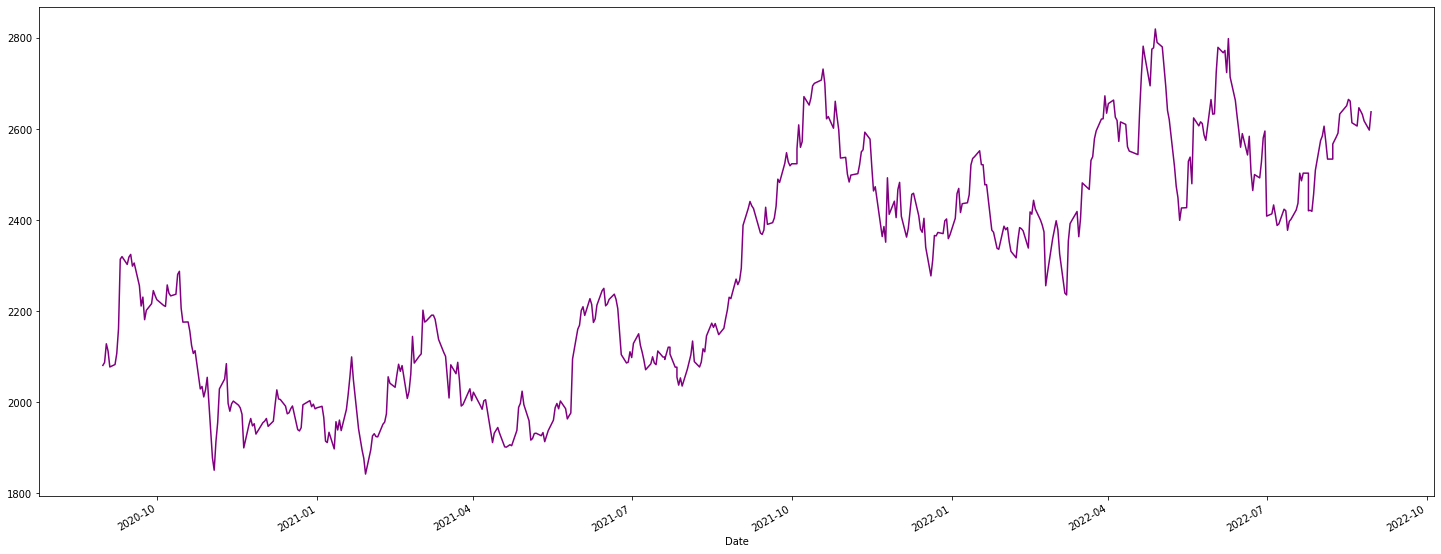

In [9]:
data2.plot(figsize=(25,10),color='purple')

In [10]:
data3 = data2.reset_index(drop=True, inplace=False)

In [11]:
len(data3)

504

In [12]:
data3 = pd.DataFrame(data3)
data3.head(3)

,Close Price
0,2080.70
1,2087.25
2,2128.20


#***Validation***

In [79]:
x_train = data3.iloc[:488]
x_test = data3.iloc[488:]
print(len(x_train),len(x_test))

488 16


In [80]:
scaler = MinMaxScaler()
scaler.fit(x_train)
scaled_train = scaler.transform(x_train)
scaled_test = scaler.transform(x_test)

In [81]:
length = 16
batch_size = 32

generator = TimeseriesGenerator(scaled_train,scaled_train,length = length,batch_size = batch_size )

In [83]:
validation = TimeseriesGenerator(x_test,x_test,length = 15, batch_size = batch_size)
n_features = 1
len(scaled_test)

16

In [84]:
model4 = Sequential([
        layers.SimpleRNN(256, input_shape=(length, n_features), return_sequences=True, name='simpleRNN1'),
        layers.SimpleRNN(128, name='simpleRNN2'),
        layers.Dropout(rate=0.3),
        layers.Dense(1),
        ], name='SIMPLERNN')
model4.compile(optimizer='adam',loss='mse')

Epoch 1/20
 8/15 [===============>..............] - ETA: 0s - loss: 0.0125

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


15/15 [==============================] - 0s 18ms/step - loss: 0.0240
Epoch 2/20
15/15 [==============================] - 0s 16ms/step - loss: 0.0123
Epoch 3/20
15/15 [==============================] - 0s 16ms/step - loss: 0.0170
Epoch 4/20
15/15 [==============================] - 0s 16ms/step - loss: 0.0180
Epoch 5/20
15/15 [==============================] - 0s 16ms/step - loss: 0.0155
Epoch 6/20
15/15 [==============================] - 0s 16ms/step - loss: 0.0077
Epoch 7/20
15/15 [==============================] - 0s 17ms/step - loss: 0.0049
Epoch 8/20
15/15 [==============================] - 0s 16ms/step - loss: 0.0036
Epoch 9/20
15/15 [==============================] - 0s 18ms/step - loss: 0.0043
Epoch 10/20
15/15 [==============================] - 0s 16ms/step - loss: 0.0037
Epoch 11/20
15/15 [==============================] - 0s 17ms/step - loss: 0.0038
Epoch 12/20
15/15 [==============================] - 0s 16ms/step - loss: 0.0031
Epoch 13/20
15/15 [=============================

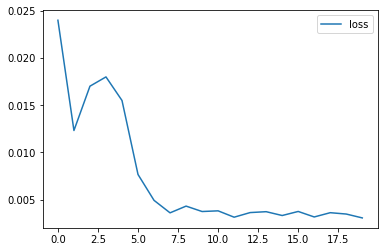

In [86]:
model4.fit_generator(generator,epochs=20, shuffle=False)

losses = pd.DataFrame(model4.history.history)
losses.plot()

[[2478.679 ]
 [2494.1348]
 [2562.575 ]
 [2545.2551]
 [2562.6785]
 [2562.6785]
 [2476.7527]
 [2477.898 ]
 [2475.5032]
 [2514.932 ]
 [2569.2598]
 [2636.8938]
 [2647.0046]
 [2669.3696]
 [2633.849 ]
 [2594.6804]]


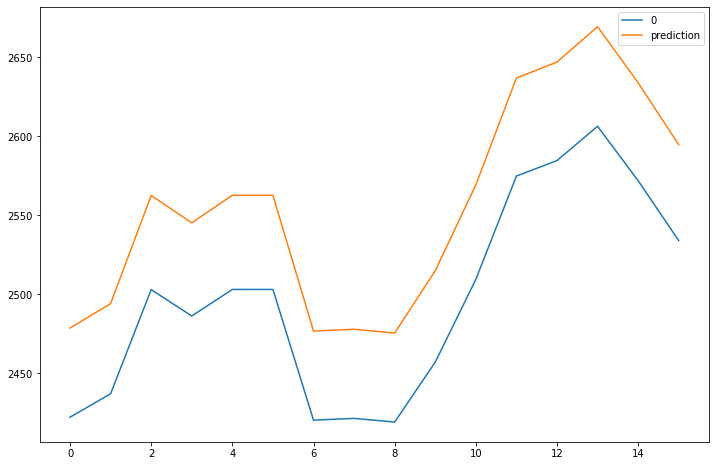

In [114]:
first_eval = scaled_train[-length:]
first_eval

forecast = scaler.inverse_transform(model4.predict(first_eval))
print(forecast)
evaluation = pd.DataFrame(scaler.inverse_transform(first_eval))

evaluation['prediction'] = pd.DataFrame(scaler.inverse_transform(model4.predict(first_eval)))
evaluation.plot(figsize = (12,8))



#***Model***

In [65]:
scaler_max = MinMaxScaler()
scaler_max.fit(data3)
full_dat = scaler_max.transform(data3)

In [66]:
generatorf = TimeseriesGenerator(full_dat,full_dat, length=16)

In [109]:
modelf = Sequential([
        layers.SimpleRNN(128, input_shape=(length, n_features), return_sequences=True, name='simpleRNN1'),
        layers.SimpleRNN(64, name='simpleRNN2'),
        layers.Dropout(rate=0.3),
        layers.Dense(1),
        ], name='SIMPLERNN')
modelf.compile(optimizer='adam',loss='mse')

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


4/4 [==============================] - 1s 14ms/step - loss: 0.7001
Epoch 2/20
4/4 [==============================] - 0s 14ms/step - loss: 0.4309
Epoch 3/20
4/4 [==============================] - 0s 15ms/step - loss: 0.3009
Epoch 4/20
4/4 [==============================] - 0s 15ms/step - loss: 0.1378
Epoch 5/20
4/4 [==============================] - 0s 15ms/step - loss: 0.1046
Epoch 6/20
4/4 [==============================] - 0s 16ms/step - loss: 0.0969
Epoch 7/20
4/4 [==============================] - 0s 15ms/step - loss: 0.0540
Epoch 8/20
4/4 [==============================] - 0s 13ms/step - loss: 0.0360
Epoch 9/20
4/4 [==============================] - 0s 18ms/step - loss: 0.0389
Epoch 10/20
4/4 [==============================] - 0s 15ms/step - loss: 0.0273
Epoch 11/20
4/4 [==============================] - 0s 14ms/step - loss: 0.0195
Epoch 12/20
4/4 [==============================] - 0s 14ms/step - loss: 0.0158
Epoch 13/20
4/4 [==============================] - 0s 14ms/step - loss: 

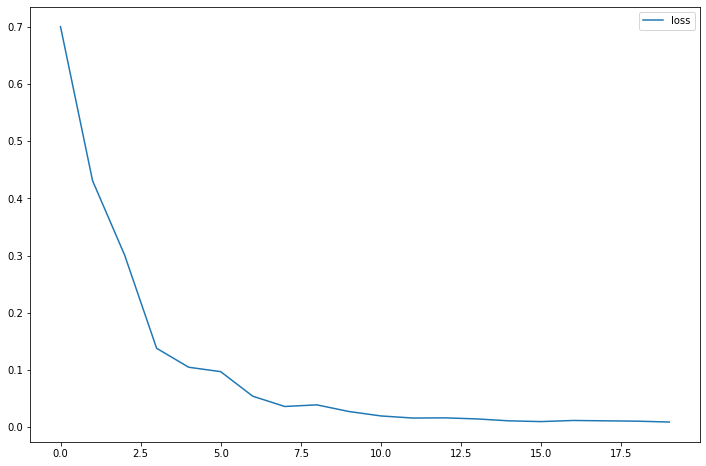

In [110]:
modelf.fit_generator(generatorf,epochs = 20, shuffle=False)
losses = pd.DataFrame(modelf.history.history)
losses.plot(figsize=(12,8))

FORECAST
[[2236.2302]
 [2236.3462]
 [2236.4001]
 [2236.43  ]
 [2236.577 ]
 [2236.6409]
 [2236.6895]
 [2236.6758]
 [2236.5098]
 [2236.4846]
 [2236.625 ]
 [2236.6003]
 [2236.5735]
 [2236.5244]
 [2236.4531]
 [2236.5942]]



 Date
2022-08-08    2534.00
2022-08-08    2567.15
2022-08-10    2582.50
2022-08-11    2591.10
2022-08-12    2633.00
2022-08-16    2651.30
2022-08-17    2665.15
2022-08-18    2661.30
2022-08-19    2613.85
2022-08-22    2606.60
2022-08-23    2646.80
2022-08-24    2639.75
2022-08-25    2632.05
2022-08-26    2618.00
2022-08-29    2597.65
2022-08-30    2637.95
Name: Close Price, dtype: float64 


[Stock Prediction for next 16 days]


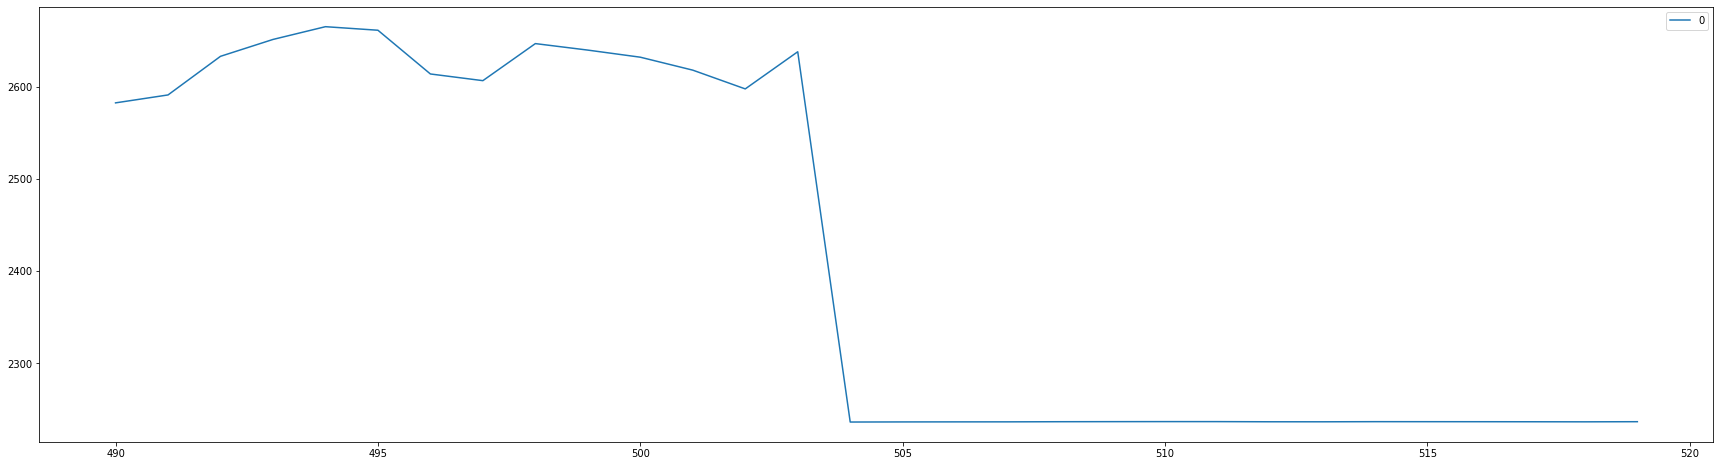

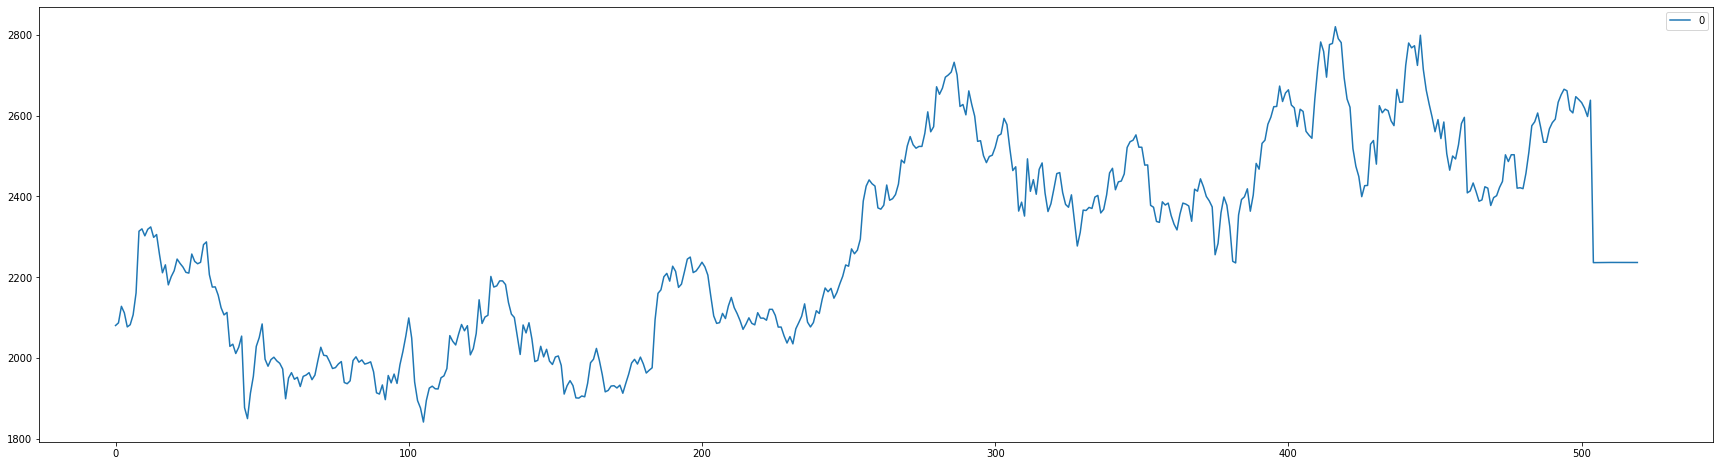

In [111]:
actual = data3[-16:]
actual

forecast = scaler_max.inverse_transform(modelf.predict(actual))
forecast.flatten()

np_array = np.array(data2)

data_full = pd.DataFrame(np.concatenate((np_array.flatten(),forecast.flatten())))
print("FORECAST")
print(forecast)
print('\n\n\n',data2.tail(16),'\n\n\n[Stock Prediction for next 16 days]')

(data_full.tail(30)).plot(figsize=(30,8))
(data_full).plot(figsize=(30,8))